<a href="https://colab.research.google.com/github/bivekpok/DSPS_BPokhrel/blob/main/HW4/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

prepared by federica b bianco @fedhere
for UDel DSPS PHYS 461/661

# testing the "significance" of Dark Matter

In [1]:
...

#package I will use for constants and units conversion
import astropy
from astropy.constants import G

#package used to display latex formuale
from IPython.display import Latex
import pandas as pd
import numpy as np
import scipy


import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
from astropy import units as u


In 1970 Vera Rubin published a seminal paper: she measured the rotational speed of HII regions in several galaxies and how it changed as a function of distance to the center of the galaxy. If we believe Newtonian gravity (or GR) we expect that _once all of the mass is included_, i.e. at a radius distance from the center of the galaxy larger than the radius of the galaxy itself, the rotational speed will be proportional to $v\propto\frac{1}/{r}$

## Propagation of  uncertainties rules

below are the basic rules for propagation of uncertainties - use [this as reference](https://github.com/fedhere/DSPS/blob/master/resources/Managing%20Errors%20and%20Uncertainty.pdf)




$$
\begin{eqnarray}
z = x  \pm y  ~| & ~  &dz = \sqrt{dx^2 + dy^2}
\\
z = x * y  ~| & ~& dz = |xy|  \sqrt{\left(\frac{dx}{x}\right)^2 +
                                \left(\frac{dy}{y}\right)^2} \\
z = x / y  ~| & ~& dz = \left|\frac{x}{y}\right| \sqrt{\left(\frac{dx}{x}\right)^2 +
                                                   \left(\frac{dy}{y}\right)^2} \\
z = x^n ~| & ~& dz = |n| ~ x^{n-1}  dx \\
z = \mathrm{c}x ~| & ~& dz = |\mathrm{c}| ~dx \\
z = f(x, y) ~| & ~& dz = \sqrt{\left(\frac{\partial f}{\partial x}\right)^2 dx^2 +\left(\frac{\partial f}{\partial y}\right)^2 dy^2} \\
\end{eqnarray}
$$


# let's assume a Newtonian framework:
the velocity of a body in orbit depends only on the gravitational field of the mass that attracts it, and we can assume that mass is concentrated in the center of mass of (the center for simplicity) the system

with G the gravitational constant, $r$ the radius, and $m(r)$ the mass contained within that radius we have the orbital velocity $v$:



$v^2 = \frac{G \cdot m(r)}{r}$


Derive this $v\propto\frac{1}{r}$ from Newron's law $F~=~\frac{GMm}{r^2}$. Write each formula and describe each step. You can use latex (you really just need to know ```\frac{}``` and ```^```) and this reference
https://www.physicsclassroom.com/calcpad/circgrav

Newtons Gravitational force  Fg =  $\frac{GMm}{r^2}$ <br>
Centripetal force Fc = $\frac{mv^2}{r}$ <br>

* Fg is the gravitational force between two objects.
* G is the gravitational constant.
* M is the mass of the central body (e.g., a planet).
* m is the mass of the orbiting body (e.g., a satellite).
* r is the distance between the centers of the two objects.
* Fc is the centripetal force.
* v is the orbital velocity.

Equating both forces to get the orbital velocity: <br>
$\frac{GMm}{r^2}$ =$\frac{mv^2}{r}$ <br>
m and r cancel and we are left with: <br>
$\frac{GM}{r}$ =${v^2}$ <br>
this implies : <br>
 ${v^2}$ = $\frac{Constant}{r}$ <br>
 ${v}$ ∝ $\frac{1}{√r}$ <br>
This implies that at larger distances the velocity varies at 1/sqrt (r).


## M31 rotational curve

### data ingestion
( I store the original paper as a link on another computer now I have to find it again :-( - sorry I will updat the reference )

Get the data from the github repository https://github.com/fedhere/DSPS/tree/master/HW4 : there are 2 files: mw.csv and m31.csv. Start with M31, the Andromeda galaxy, Vera Rubin's original target.

Note that the data contains 2 types of uncertainties: one significantly smaller than the other. The ```dv``` uncertainty is the propagation of the uncertainty in the location of the HII line. The uncertainty called ```err``` if the full error budget:  including _all_ sources of uncertainty and not just the uncertainty in measuring the location of the line. Retain both, you will test your hypothesis with each one to see if it matters which uncertainty you choose

In [2]:
m31 = pd.read_csv('https://raw.githubusercontent.com/fedhere/DSPS_FBianco/main/HW4/m31.csv', skipinitialspace=True, skiprows = [0])

In [3]:
m31.head()

,#R(kpc,V(km/s),St.dev.,St.error
0,0.100,183.939,0.000,0.000
1,0.120,190.710,10.265,12.191
2,0.144,204.141,22.634,21.808
3,0.173,207.601,4.573,4.200
4,0.207,210.188,3.943,3.258


In [4]:
mw = pd.read_csv('https://raw.githubusercontent.com/fedhere/DSPS_FBianco/360e48bf3b762be5d17d2c2d595a03a23f334451/HW4/mw.csv', skipinitialspace=True, skiprows = [0])
mw.head()

,R(kpc),V(km/s),St.dev.,St.error
0,0.010,119.061,41.832,32.714
1,0.012,115.268,35.199,17.100
2,0.014,117.392,35.152,14.429
3,0.017,118.475,35.252,14.870
4,0.021,110.386,33.817,14.427


# exploratory data analysis
proceed with at least a few basic exploratory tasks

In [5]:
m31.describe()

,#R(kpc,V(km/s),St.dev.,St.error
count,55.000000,55.000000,55.000000,55.000000
mean,205.853182,226.079255,55.034818,16.165855
std,415.523904,42.799892,49.254792,14.876951
min,0.100000,121.974000,0.000000,0.000000
25%,1.177000,208.894500,11.945500,3.224000
50%,13.737000,229.124000,30.697000,12.065000
75%,161.675000,244.102500,99.980000,23.641000
max,1887.071000,414.942000,147.835000,54.110000


In [6]:
mw.describe()

,R(kpc),V(km/s),St.dev.,St.error
count,64.000000,64.000000,64.000000,64.000000
mean,142.281500,187.101219,48.249063,19.003297
std,348.144773,52.161901,41.255286,23.513466
min,0.010000,93.042000,3.370000,0.868000
25%,0.177250,138.676250,12.585500,2.709750
50%,3.133500,204.576000,35.288500,13.923000
75%,55.298250,235.920500,68.412750,24.791250
max,1682.532000,255.300000,165.096000,110.484000


from https://en.wikipedia.org/wiki/Andromeda_Galaxy get the extent of the luminous component of M31 (Andromeda). The distance of the Galaxy multiplied by the angular size will give you this information from basic trigonometry (make sure you convert the units properly, using astropy). Make sure you include the uncertainties! uncertainties in the distance will give you the uncertainty in the size
   


In [7]:
 apparentSizeM31 = 3.167 #degree


In [8]:
m31angS = apparentSizeM31 * u.degree
print("Angular Size of the visible component of Andromeda: {:.2f}".format(m31angS.to(u.rad)  ))

Angular Size of the visible component of Andromeda: 0.06 rad


Please make sure you print a sensible number of decimal digits! you have a  number of significant digits set by the number of digit in the info you get from wikipedia

The distance, from Wikipedia, will have an uncertainty. Convert both to kiloparsecs Kpc

In [9]:
distance = (2.52 * (10**6) * u.lightyear).to(u.kpc)
dist_error = (0.14 * (10**6) * u.lightyear).to(u.kpc)

print(f' distance from the observer is : {distance:.2f}')
print(f' error in the distance is : {dist_error:.2f}')


 distance from the observer is : 772.64 kpc
 error in the distance is : 42.92 kpc


In [10]:
def physical_size(d, angle):
  """ Return:Physical size of the object from the angular size and the distance. """
  L = 2* d * np.tan(angle/2)
  return L

In [11]:
m31Size = physical_size(distance, m31angS.to(u.rad))
m31size_error = physical_size(dist_error, m31angS.to(u.rad)) # assuming only error in distance and not in angle
print("Size (diameter) of the visible component of Andromeda: " +
      r"{:.0f} +/- {:2.1f}".format(m31Size, m31size_error))#, m31SizeError


Size (diameter) of the visible component of Andromeda: 43 kpc +/- 2.4 kpc


Print the distance like I printed the angular size.

To get the physical size of the visible component of andtomeda you can use simple trigonometry: $y = r * sin(\alpha) ~ \sim ~ r \alpha $ for small angles


Print the physical size of the Andromeda galaxy (remember decimal digits, proper formatting etc etc).


### find the first measurement  in your data table that includes all the luminous mass.

What is the smallest radius in your data where the luminous mass is completely included and what is the veolcity at that radius?
You can do it by broadcasting (see homework 3)

In [12]:

m31_all = m31[m31['#R(kpc'] > m31Size]
luminous_size = m31_all['#R(kpc'].values[0]
luminous_velocity= m31_all['V(km/s)'].values[0]
print(f'luminous_size: {luminous_size:0.2f}')
print(f'luminous_velocity: {luminous_velocity:0.2f}')
print(m31_all)

luminous_size: 49.22
luminous_velocity: 237.07
      #R(kpc  V(km/s)  St.dev.  St.error
34    49.222  237.069  109.381    23.924
35    59.067  249.443  134.552    26.447
36    70.880  218.489  132.355    24.657
37    85.056  206.603  135.003    27.258
38   102.068  213.002  132.456    29.321
39   122.481  197.383  105.727    23.358
40   146.977  177.521   81.762    16.662
41   176.373  165.325   74.652    15.706
42   211.647  165.134   76.929    18.733
43   253.977  160.787   77.400    22.720
44   304.772  151.102   74.793    27.879
45   365.727  121.974   96.480    43.431
46   438.872  168.303  125.736    51.482
47   526.647  200.545  123.350    52.949
48   631.976  238.973  147.835    36.195
49   758.371  248.069  145.005    19.716
50   910.046  250.377  141.353    22.663
51  1092.055  241.900  138.657    39.031
52  1310.466  235.039  103.480    46.508
53  1572.559  332.734  109.504    54.110
54  1887.071  414.942   69.579    27.931


We expect the velocity to decrease as 1/r if all mass is included: the velocity at a radius twice as far as the radius that includes all the mass should be a factor 2 slower, three times as far a factor 3 slower.

write a function that

1. finds the smallest radius in the dataset that is at least N times the radius of the visible galaxy,

2. takes as arguments:
    - the data and
    - N
    - the size of the luminous component of the galaxy

2. Returns the value of the radius and its uncertainty and the velocity and its uncertainty

In [13]:

def getradii(data, N =2, lumin_size = luminous_size):
    """
    Find the smallest radius in the dataset that is at least N times the luminous size.

    Args:
        data (DataFrame): The dataset containing radius, velocity, standard deviation, and standard error.
        N (float): A factor to determine the minimum radius.
        luminous_size (float): The size of the luminous component of the galaxy.

    Returns:
        Tuple: (radius, radius_uncertainty, velocity, velocity_uncertainty)
    """
    # Filter the dataset to find the rows where radius >= N * luminous_size
    filtered_data = data[data['#R(kpc'] >= N * luminous_size/2]
    sorted_data = filtered_data.sort_values(by = '#R(kpc')

    if filtered_data.empty:
        return None  # No matching data found

    # Get the first row of the filtered data
    first_row = sorted_data.iloc[0]

    # Extract the values
    radius = first_row['#R(kpc']
    sd = first_row['St.dev.']
    velocity = first_row['V(km/s)']
    err = first_row['St.error']

    return radius, sd, velocity, err

print(getradii(m31, N=1))
print(getradii(m31, N=2))
print(getradii(m31, N=3))
radius1, sd1, velocity1, err1 = getradii(m31, N=1)
radius2, sd2, velocity2, err2 = getradii(m31, N=2)
radius3, sd3, velocity3, err3 = getradii(m31, N=3)
radius = {}
sd = {}
velocity = {}
err = {}
for i in range(3):
  radius[i+1], sd[i+1], velocity[i+1], err[i+1] = getradii(m31, N=i+1)
print(radius)



...

(28.485, 16.577, 232.335, 2.106)
(49.222, 109.381, 237.069, 23.924)
(85.056, 135.003, 206.603, 27.258)
{1: 28.485, 2: 49.222, 3: 85.056}


Ellipsis

### data visualization

make a plot that shows

1. the rotational curve of the galaxy (as a line)

2. each velocity as an errorbar with error equal to err in the same color as the line in 1

3. each velocity as an errorbar with error equal to dv in  the same color but a different line thickness


4. the datapoint corresponding to N=1, 2, 3 each in a different color.

5. add a legend that indicates the meaning of each color (```pl.legend()```)

6. add a text that indicates the velocity and its uncertainty (dv and err) just below the largest errorbar (```pl.text()```)

7. limit the x axis to the "relevant" portion of the data

1
28.485 16.577 232.335 2.106
2
49.222 109.381 237.069 23.924
3
85.056 135.003 206.603 27.258


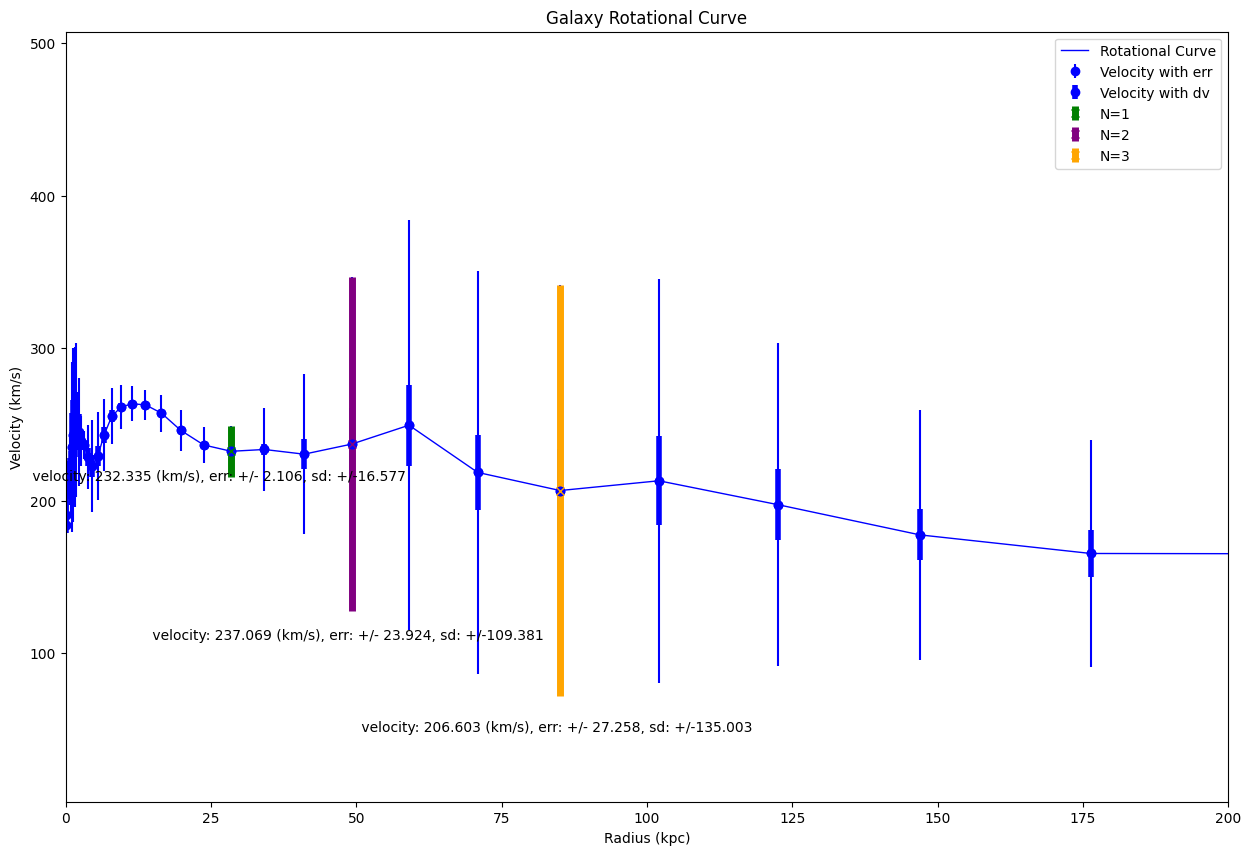

In [14]:

N_values = [1, 2, 3]
all_radius = m31['#R(kpc']
all_velocity = m31['V(km/s)']
all_err = m31['St.error']
all_sd = m31['St.dev.']

# Create a new figure and axis
fig, ax = plt.subplots(figsize = (15,10))

# Plot the rotational curve as a line
ax.plot(all_radius, all_velocity, label='Rotational Curve', color='blue', linestyle='-', linewidth=1)

# Plot each velocity as an error bar with error equal to err
ax.errorbar(all_radius, all_velocity, yerr=all_sd, fmt='o', label='Velocity with err', color='blue')

# Plot each velocity as an error bar with error equal to dv and different line thickness
ax.errorbar(all_radius, all_velocity, yerr=all_err, fmt='o', label='Velocity with dv', color='blue', linewidth=4)

# Plot data points corresponding to N=1, 2, 3 in different colors
for N, color in zip(N_values, ['green', 'purple', 'orange']):
  print(N)
  print(radius[N], sd[N], velocity[N], err[N])
#   radius{N}, sd{N}, velocity{N}, err{N} = getradii(m31, N, lumin_size=luminous_size)
#   print(radius)
#   print(velocity)

  # ax.errorbar(radius[N], velocity[N], yerr = err[N], fmt='o', label=f'N={N}', color=color)
  ax.errorbar(radius[N], velocity[N], yerr = sd[N], fmt='x', label=f'N={N}', color=color, linewidth = 5)


# # Add a legend
  ax.legend()

  # # Add text indicating velocity and its uncertainty (dv and err) below the largest error bar
  # max_err_index = err.index(max(all_err))
  ax.text(radius[N]-35, velocity[N] - 1.17*np.max(sd[N]), f' velocity: {velocity[N]} (km/s), err: +/- {err[N]}, sd: +/-{sd[N]}')
  # ax.text(0.8*radius[N], -0.2, f' velocity: {velocity[N]}, err: {err[N]}, sd: {sd[N]}' , transforms= transforms)
  ax.set_xlim(0, 0.6)

  # Add labels and title
ax.set_xlabel('Radius (kpc)')
ax.set_ylabel('Velocity (km/s)')
plt.title('Galaxy Rotational Curve')
ax.set_xlim(0, 200)

# Display the plot
plt.show()


In [15]:

# for vratio
def analyze_rotational_velocities(data, luminous_radius, N):
    """
    Analyze rotational velocities of a galaxy.

    Parameters:
    - data: DataFrame containing the data (columns: radius, velocity, err)
    - luminous_radius: Luminous radius of the galaxy
    - N: Number of radii to analyze

    Returns:
    - None (prints the analysis results)
    """
    # Function to calculate the radius at least as large as needed
    radius_1, sd_1, velocity_1, err_1 = getradii(m31, N=1)
    radius_N, sd_N, velocity_N, err_N = getradii(m31, N=N)

    # Calculate the radius and velocity at least as large as needed
    # radius_N, velocity_N, err_N = get_radius_at_least_N(data, N)

    # Expected drop in rotational velocities according to Newton's law (!!!  I got (sqrt(1/r) but I followed the question. !!!)
    expected_drop = 1 / np.sqrt(N)


    radius_ratio = radius_N / (N * luminous_radius)
    velocity_ratio = velocity_N / velocity_1

    def isin(error):
      '''
      Check if a value is within a 2-sigma range of error of vration from the error in v is given.

      Args:
      error (str): Type of error ('err' for standard error, 'sd' for standard deviation).
      expected_value (float): The expected value.
      actual_value (float): The actual observed value.
      sigma (float): The standard deviation or standard error.

      Returns:
      str: 'consistent' or 'inconsistent' depending on whether the value is within 2-sigma.  '''
      if error == 'err':
        propagated_error = abs(velocity_N/velocity_1)* np.sqrt((err_N/velocity_N)**2 + (err_1/velocity_1)**2)

      elif error == 'sd':
        propagated_error = abs(velocity_N/velocity_1)* np.sqrt((sd_N/velocity_N)**2 + (sd_1/velocity_1)**2)

      else:
        print('Check the error string')

      dif = abs(expected_drop-velocity_ratio)
      if dif < 2*propagated_error:
        print(f" - Difference in ratio:  {dif}")
        print(f" - The ratio is consistent with Newton's law within 2*sigma = {2*propagated_error} as uncertainties. \n")
      else:
        print(f" - The ratio is consistent not within Newton's law within 2*sigma = {2*propagated_error} as uncertainties. \n")

    # # Check if the ratio is consistent with Newton's law
    # within_uncertainties_err = np.isclose(velocity_ratio, 1 / radius_ratio, rtol=err_N / velocity_N)
    # within_uncertainties_sd = np.isclose(velocity_ratio, 1 / radius_ratio, rtol=sd_N / velocity_N)

    # Print the results
    print(f"Analysis for N = {N} using err:")
    print(f" - Radius at least as large as needed: {radius_N} kpc")
    print(f" - Velocity at that radius: {velocity_N} km/s")
    print(f" - Ratio of radii: {radius_ratio:.3f}")
    print(f" - Expected ratio in rotational velocities (Newton's law): {expected_drop:3f}")
    print(f" - Ratio of velocities based on radii: {velocity_ratio:.3f}")
    isin(error= 'err')

    # if within_uncertainties_err:
    #     print(" - The ratio is consistent with Newton's law within err uncertainties.")
    # else:
    #     print(" - The ratio is not consistent with Newton's law within err uncertainties. \n")

    # Print the results
    print(f"Analysis for N = {N} using sd:")
    print(f" - Radius at least as large as needed: {radius_N} kpc")
    print(f" - Velocity at that radius: {velocity_N} km/s")
    print(f" - Expected drop in rotational velocities (Newton's law): {expected_drop:3f}")
    print(f" - Ratio of radii: {radius_ratio:.3f}")
    print(f" - Ratio of velocities based on radii: {velocity_ratio:.3f}")
    isin(error = 'sd')

    # if within_uncertainties_sd:
    #     print(" - The ratio is consistent with Newton's law within sd as uncertainties.")
    # else:
    #     print(" - The ratio is not consistent with Newton's law within sd as uncertainties. \n \n")

# Example usage:
analyze_rotational_velocities(m31, luminous_radius = 21, N=1)
analyze_rotational_velocities(m31, luminous_radius = 21, N=2)
analyze_rotational_velocities(m31, luminous_radius = 21, N=3)


Analysis for N = 1 using err:
 - Radius at least as large as needed: 28.485 kpc
 - Velocity at that radius: 232.335 km/s
 - Ratio of radii: 1.356
 - Expected ratio in rotational velocities (Newton's law): 1.000000
 - Ratio of velocities based on radii: 1.000
 - Difference in ratio:  0.0
 - The ratio is consistent with Newton's law within 2*sigma = 0.025638270276606954 as uncertainties. 

Analysis for N = 1 using sd:
 - Radius at least as large as needed: 28.485 kpc
 - Velocity at that radius: 232.335 km/s
 - Expected drop in rotational velocities (Newton's law): 1.000000
 - Ratio of radii: 1.356
 - Ratio of velocities based on radii: 1.000
 - Difference in ratio:  0.0
 - The ratio is consistent with Newton's law within 2*sigma = 0.2018070305675753 as uncertainties. 

Analysis for N = 2 using err:
 - Radius at least as large as needed: 49.222 kpc
 - Velocity at that radius: 237.069 km/s
 - Ratio of radii: 1.172
 - Expected ratio in rotational velocities (Newton's law): 0.707107
 - Ratio

### Discuss!


The results are consitent with both kinds of error i.e err and sd.

## do the same for the Milky Way. If your functions were create properly you should be able to reuse them seamlessly

In [16]:
 apparentSizeMW = 30 #degree
 mwangS = apparentSizeMW * u.degree
print("Angular Size (diameter) of the visible component of Milky-way: {:.2f}".format(mwangS.to(u.rad)  ))

Angular Size (diameter) of the visible component of Milky-way: 0.52 rad


In [17]:
MWdistance = (27.5 * (10**3) * u.lightyear).to(u.kpc)
MWdist_error = (0.14 * (10**3) * u.lightyear).to(u.kpc)

print(f' distance from the observer is : {MWdistance:.2f}')
print(f' error in the distance is : {MWdist_error:.5f}')


 distance from the observer is : 8.43 kpc
 error in the distance is : 0.04292 kpc


In [18]:
MWSize = physical_size(MWdistance, mwangS.to(u.rad))
MWsize_error = physical_size(MWdist_error, mwangS.to(u.rad)) # assuming only error in distance and not in angle
print("Size of the visible component of Milky way: " +
      r"{:.0f} +/- {:2.1f}".format(MWSize, MWsize_error))

Size of the visible component of Milky way: 5 kpc +/- 0.0 kpc


In [19]:
mw_all = mw[mw['R(kpc)'] > MWSize]
mwluminous_size = mw_all['R(kpc)'].values[0]
mwluminous_velocity= mw_all['V(km/s)'].values[0]
print(f'luminous_size: {mwluminous_size:0.2f} (kpc)')
print(f'luminous_velocity: {mwluminous_velocity:0.2f} (km/s)')
print(mw_all)

luminous_size: 4.92 (kpc)
luminous_velocity: 232.17 (km/s)
      R(kpc)  V(km/s)  St.dev.  St.error
34     4.922  232.173   12.488     1.089
35     5.907  236.962   12.605     0.921
36     7.088  238.210   13.524     0.868
37     8.506  236.831   18.629     1.169
38    10.207  237.410   27.047     1.818
39    12.248  241.337   35.449     2.753
40    14.698  247.075   42.102     4.069
41    17.637  252.483   49.524     6.235
42    21.165  255.300   58.570     9.816
43    25.398  252.966   66.790    14.565
44    30.477  240.165   74.879    20.538
45    36.573  221.220   75.011    24.638
46    43.887  195.333   68.490    24.316
47    52.665  175.414   56.813    20.165
48    63.198  177.979   47.004    16.345
49    75.837  187.898   49.195    16.343
50    91.005  179.697   62.587    20.907
51   109.205  155.444   77.128    28.516
52   131.047  128.756   88.515    39.433
53   157.256  106.210   99.924    57.180
54   188.707  133.638  165.096   107.880
55   226.449  206.093  163.199   110.48

In [20]:
def getradii_mw(data, N =2, lumin_size = mwluminous_size):
    """
    Find the smallest radius in the dataset that is at least N times the luminous size.

    Args:
        data (DataFrame): The dataset containing radius, velocity, standard deviation, and standard error.
        N (float): A factor to determine the minimum radius.
        luminous_size (float): The size of the luminous component of the galaxy.

    Returns:
        Tuple: (radius, radius_uncertainty, velocity, velocity_uncertainty)
    """
    # Filter the dataset to find the rows where radius >= N * luminous_size
    filtered_data = data[data['R(kpc)'] >= N * mwluminous_size/2]
    sorted_data = filtered_data.sort_values(by = 'R(kpc)')

    if filtered_data.empty:
        return None  # No matching data found

    # Get the first row of the filtered data
    first_row = sorted_data.iloc[0]

    # Extract the values
    radius = first_row['R(kpc)']
    sd = first_row['St.dev.']
    velocity = first_row['V(km/s)']
    err = first_row['St.error']

    return radius, sd, velocity, err


radius1, sd1, velocity1, err1 = getradii_mw(mw, N=1)
radius2, sd2, velocity2, err2 = getradii_mw(mw, N=2)
radius3, sd3, velocity3, err3 = getradii_mw(mw, N=3)
radius_mw = {}
sd_mw = {}
velocity_mw = {}
err_mw = {}
for i in range(3):
  radius_mw[i+1], sd_mw[i+1], velocity_mw[i+1], err_mw[i+1] = getradii_mw(mw, N=i+1)
print(radius_mw)

{1: 2.849, 2: 4.922, 3: 8.506}


1
28.485 16.577 232.335 2.106
2
49.222 109.381 237.069 23.924
3
85.056 135.003 206.603 27.258


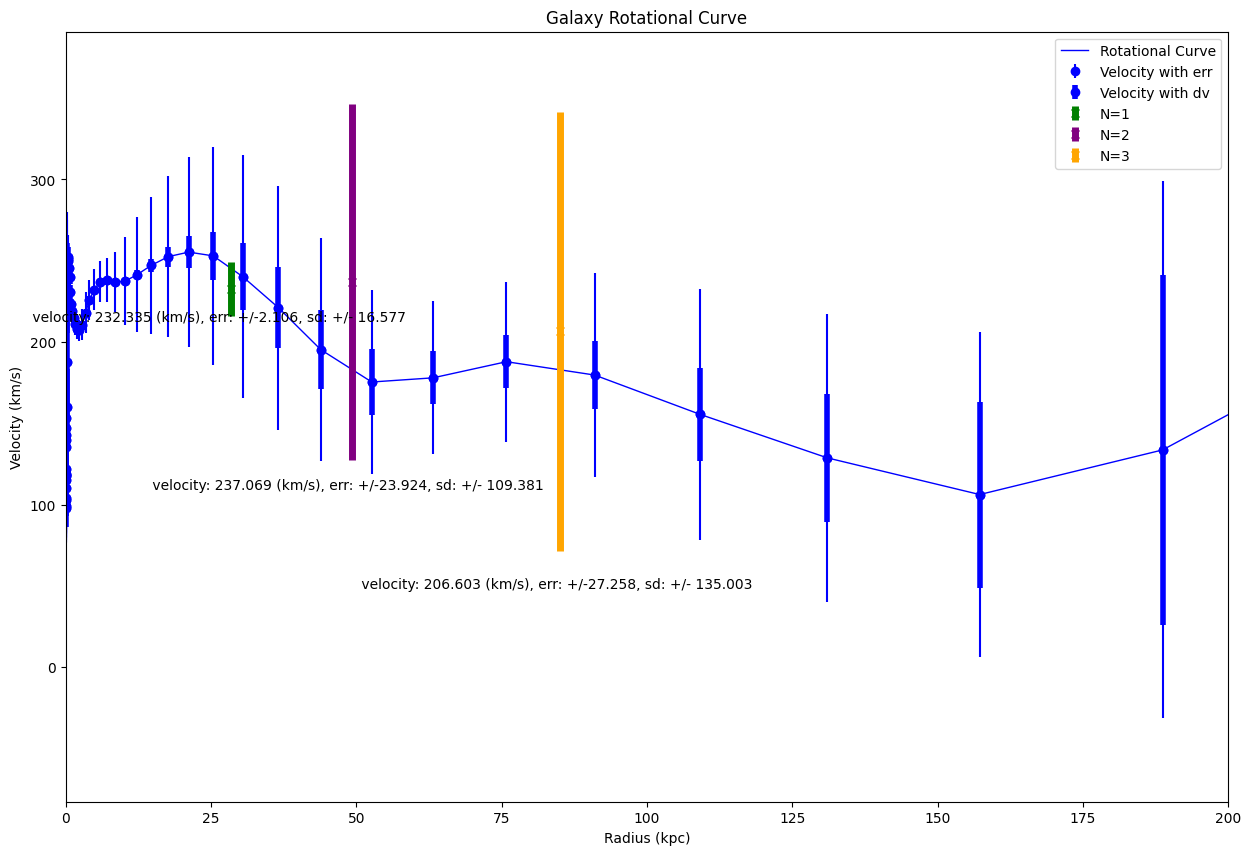

In [21]:

N_values = [1, 2, 3]
all_radius = mw['R(kpc)']
all_velocity = mw['V(km/s)']
all_err = mw['St.error']
all_sd = mw['St.dev.']

# Create a new figure and axis
fig, ax = plt.subplots(figsize = (15,10))

# Plot the rotational curve as a line
ax.plot(all_radius, all_velocity, label='Rotational Curve', color='blue', linestyle='-', linewidth=1)

# Plot each velocity as an error bar with error equal to err
ax.errorbar(all_radius, all_velocity, yerr=all_sd, fmt='o', label='Velocity with err', color='blue')

# Plot each velocity as an error bar with error equal to dv and different line thickness
ax.errorbar(all_radius, all_velocity, yerr=all_err, fmt='o', label='Velocity with dv', color='blue', linewidth=4)

# Plot data points corresponding to N=1, 2, 3 in different colors
for N, color in zip(N_values, ['green', 'purple', 'orange']):
  print(N)
  print(radius[N], sd[N], velocity[N], err[N])
#   radius{N}, sd{N}, velocity{N}, err{N} = getradii(m31, N, lumin_size=luminous_size)
#   print(radius)
#   print(velocity)

  # ax.errorbar(radius[N], velocity[N], yerr = err[N], fmt='o', label=f'N={N}', color=color)
  ax.errorbar(radius[N], velocity[N], yerr = sd[N], fmt='x', label=f'N={N}', color=color, linewidth = 5)


# # Add a legend
  ax.legend()

  # # Add text indicating velocity and its uncertainty (dv and err) below the largest error bar
  # max_err_index = err.index(max(all_err))
  ax.text(radius[N]-35, velocity[N] - 1.17*np.max(sd[N]), f' velocity: {velocity[N]} (km/s), err: +/-{err[N]}, sd: +/- {sd[N]}')
  # ax.text(0.8*radius[N], -0.2, f' velocity: {velocity[N]}, err: {err[N]}, sd: {sd[N]}' , transforms= transforms)
  ax.set_xlim(0, 0.6)

  # Add labels and title
ax.set_xlabel('Radius (kpc)')
ax.set_ylabel('Velocity (km/s)')
plt.title('Galaxy Rotational Curve')
ax.set_xlim(0, 200)

# Display the plot
plt.show()


In [22]:

# for vratio
def analyze_rotational_velocitiesmw(data, luminous_radius, N):
    """
    Analyze rotational velocities of a galaxy.

    Parameters:
    - data: DataFrame containing the data (columns: radius, velocity, err)
    - luminous_radius: Luminous radius of the galaxy
    - N: Number of radii to analyze

    Returns:
    - None (prints the analysis results)
    """
    # Function to calculate the radius at least as large as needed
    radius_1, sd_1, velocity_1, err_1 = getradii_mw(mw, N=1)
    radius_N, sd_N, velocity_N, err_N = getradii_mw(mw, N=N)

    # Calculate the radius and velocity at least as large as needed
    # radius_N, velocity_N, err_N = get_radius_at_least_N(data, N)

    # Expected drop in rotational velocities according to Newton's law (!!!  I got (sqrt(1/r) but I followed the question. !!!)
    expected_drop = 1 / np.sqrt(N)


    radius_ratio = radius_N / (N * mwluminous_size/2)
    velocity_ratio = velocity_N / velocity_1

    def isin(error):
      '''
      Check if a value is within a 2-sigma range of error for the vratio from propagated error of v.

      Args:
      error (str): Type of error ('err' for standard error, 'sd' for standard deviation).
      expected_value (float): The expected value.
      actual_value (float): The actual observed value.
      sigma (float): The standard deviation or standard error.

      Returns:
      str: 'consistent' or 'inconsistent' depending on whether the value is within 2-sigma.  '''
      if error == 'err':
        propagated_error = abs(velocity_N/velocity_1)* np.sqrt((err_N/velocity_N)**2 + (err_1/velocity_1)**2)

      elif error == 'sd':
        propagated_error = abs(velocity_N/velocity_1)* np.sqrt((sd_N/velocity_N)**2 + (sd_1/velocity_1)**2)

      else:
        print('Check the error string')

      dif = abs(expected_drop-velocity_ratio)
      if dif < 2*propagated_error:
        print(f" - Difference in ratio:  {dif}")
        print(f" - The ratio is consistent with Newton's law within 2*sigma = {2*propagated_error} as uncertainties. \n")
      else:
        print(f" - Difference in ratio:  {dif}")
        print(f" - The ratio is not consistent  within Newton's law within 2*sigma = {2*propagated_error} as uncertainties. \n")

    # # Check if the ratio is consistent with Newton's law
    # within_uncertainties_err = np.isclose(velocity_ratio, 1 / radius_ratio, rtol=err_N / velocity_N)
    # within_uncertainties_sd = np.isclose(velocity_ratio, 1 / radius_ratio, rtol=sd_N / velocity_N)

    # Print the results
    print(f"Analysis for N = {N} using err:")
    print(f" - Radius at least as large as needed: {radius_N} kpc")
    print(f" - Velocity at that radius: {velocity_N} km/s")
    print(f" - Ratio of radii: {radius_ratio:.3f}")
    print(f" - Expected ratio in rotational velocities (Newton's law): {expected_drop:3f}")
    print(f" - Ratio of velocities based on radii: {velocity_ratio:.3f}")
    isin(error= 'err')

    # if within_uncertainties_err:
    #     print(" - The ratio is consistent with Newton's law within err uncertainties.")
    # else:
    #     print(" - The ratio is not consistent with Newton's law within err uncertainties. \n")

    # Print the results
    print(f"Analysis for N = {N} using sd:")
    print(f" - Radius at least as large as needed: {radius_N} kpc")
    print(f" - Velocity at that radius: {velocity_N} km/s")
    print(f" - Expected drop in rotational velocities (Newton's law): {expected_drop:3f}")
    print(f" - Ratio of radii: {radius_ratio:.3f}")
    print(f" - Ratio of velocities based on radii: {velocity_ratio:.3f}")
    isin(error = 'sd')

    # if within_uncertainties_sd:
    #     print(" - The ratio is consistent with Newton's law within sd as uncertainties.")
    # else:
    #     print(" - The ratio is not consistent with Newton's law within sd as uncertainties. \n \n")

# Example usage:
analyze_rotational_velocitiesmw(m31, luminous_radius = 21, N=1)
analyze_rotational_velocitiesmw(m31, luminous_radius = 21, N=2)
analyze_rotational_velocitiesmw(m31, luminous_radius = 21, N=3)


Analysis for N = 1 using err:
 - Radius at least as large as needed: 2.849 kpc
 - Velocity at that radius: 210.542 km/s
 - Ratio of radii: 1.158
 - Expected ratio in rotational velocities (Newton's law): 1.000000
 - Ratio of velocities based on radii: 1.000
 - Difference in ratio:  0.0
 - The ratio is consistent with Newton's law within 2*sigma = 0.016792535009322308 as uncertainties. 

Analysis for N = 1 using sd:
 - Radius at least as large as needed: 2.849 kpc
 - Velocity at that radius: 210.542 km/s
 - Expected drop in rotational velocities (Newton's law): 1.000000
 - Ratio of radii: 1.158
 - Ratio of velocities based on radii: 1.000
 - Difference in ratio:  0.0
 - The ratio is consistent with Newton's law within 2*sigma = 0.12783821051896888 as uncertainties. 

Analysis for N = 2 using err:
 - Radius at least as large as needed: 4.922 kpc
 - Velocity at that radius: 232.173 km/s
 - Ratio of radii: 1.000
 - Expected ratio in rotational velocities (Newton's law): 0.707107
 - Ratio o

# for HW 2

In [23]:
t ={}
tp ={}
x = {}
xp= {}
e = 10**(-7)
x[0] = 0
t[0] = 2

In [24]:
tp[0] = np.random.normal(loc=x[0], scale = 1) # q
r = np.random.rand()
x[1] = np.random.normal(loc = t[0], scale = np.sqrt(2)) #f(x)
xp[1] = np.random.normal(loc = tp[0], scale =  np.sqrt(2) ) #f(x')
print(x[1])
print(x[1]+e)
# print(x[2]/(x[1]+e)>r)
if (xp[1]/(x[1]+e)) > r:
  t[1] = tp[0]
else:
  t[1] = tp[0]

-1.0731834857733782
-1.0731833857733781


In [25]:
tp[1] = np.random.normal(loc=x[1], scale = 1)
r = np.random.rand()
x[2] = np.random.normal(loc = t[1], scale = np.sqrt(2))
xp[2] = np.random.normal(loc = tp[1], scale =  np.sqrt(2) )
if (xp[2]/(x[2]+e)) > r:
  t[2] = tp[1]
else:
  t[2] = t[1]


In [26]:
for i in range (10**4):
  tp[i+1] = np.random.normal(loc = x[i+1], scale =1)
  r = np.random.rand()
  x[i+2] = np.random.normal(loc = 2, scale = np.sqrt(2))
  xp[i+2] = np.random.normal(loc = t[i+1])

  if (xp[i+2]/(x[i+2]+e)) > r:
    t[i+2] = tp[i+1]
  else:
    t[i+2] = t[i+1]




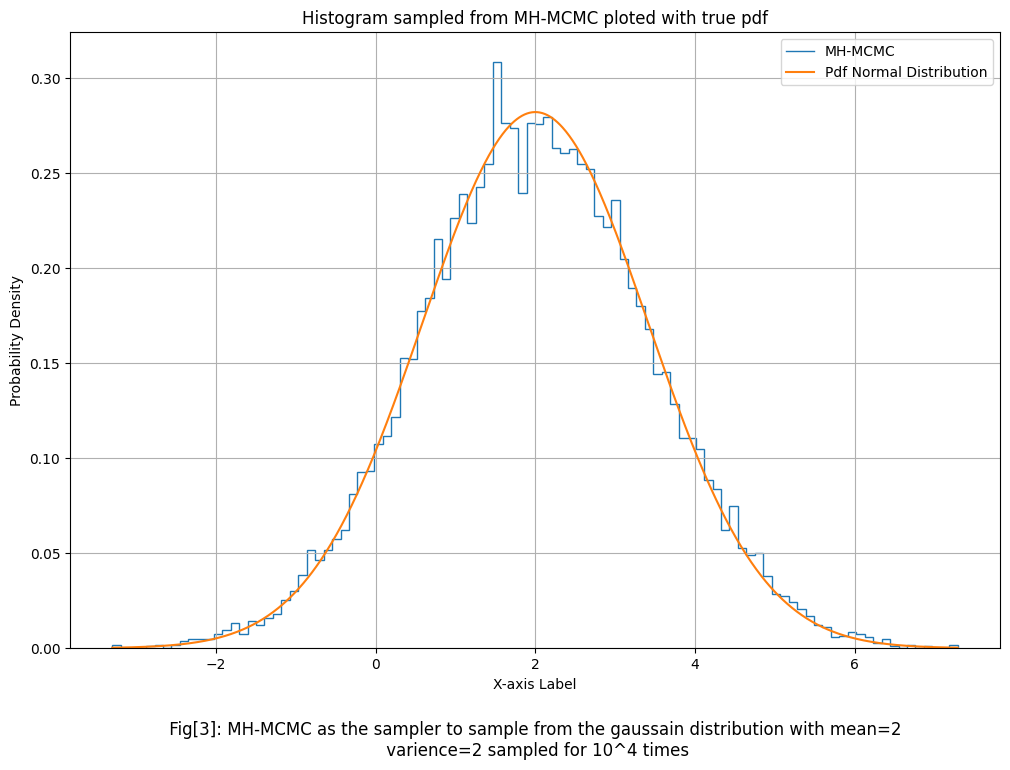

In [27]:
x_list = list(x.values())
counts, bins = np.histogram(x_list, bins=100, density =True)

# Create a range of x-values for the normal distribution
x0 = np.linspace(min(x_list), max(x_list), 1000)

# Calculate the PDF of the normal distribution
mean = 2
std_dev = np.sqrt(2)
y0 = scipy.stats.norm.pdf(x0, loc=mean, scale=std_dev)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the histogram
ax.stairs(counts, bins, label='MH-MCMC')

# Plot the normal distribution
ax.plot(x0, y0, label='Pdf Normal Distribution')

# Add labels and a legend
ax.set_xlabel('X-axis Label')
ax.set_ylabel('Probability Density')
ax.set_title('Histogram sampled from MH-MCMC ploted with true pdf')
ax.legend()

# Show the plot
plt.grid(True)
ax.text(0.5, -0.15, ' Fig[3]: MH-MCMC as the sampler to sample from the gaussain distribution with mean=2 \n varience=2 sampled for 10^4 times', fontsize=12, ha='center', va='center', transform=ax.transAxes)

plt.show()



